Imports

In [1]:
import numpy as np
# This is exclusively used in the test fitness function I have created
# Will be eliminated from the final code

import random as rd
# This is used to initiate the first generation at random positions

from matplotlib import pyplot as plt
# This is used to plot and visualise the code
# Will be eliminated from the final code

import copy
# This is a crucial library used to create true copies of the genes for creating
    # the mutant vector and the trial vector

Hyper Parameters

In [2]:
A=10
# Amplitude
# This is the maximum amplitude or loudness

Cp=0.8
# Crossover Probability
# This is the amount of crossover between the original vector and the mutant
    # vector used to create the trial vector

K=0.8
# Coefficient used to generate the mutant vector

Fr=[1]
# Coefficient used to generate the mutant vector

Ps= 100
# Population Size

Gs= 500
# Generation Size

Cl=3
# Chromosome Length
# This is the number of Time Frames in a single song
# It is set at 3 for the fitness function provided to work

Gl=2
# Gene Length
# This is the number of frequency Bins in a single Time Frame
# It is set at 2 for the fitness function provided to work

fitness=[]
# Best Fitness List
# This is a list of the best fitness in every generation for plotting purposes
# Will be eliminated from the final code

Test Fitness Function

In [3]:
T=[]

for i in range(Cl):
    T.append([])
    
    for j in range(Gl):
        T[i].append([rd.uniform(0,A), rd.uniform(0,360)])

# Test Chromosome
# Let us assume that this chromosome is the perfect song
# The goal of our algorithm then is to achieve the closest chromosome that
    # replicates this

In [4]:
def ff(L):
# Fitness Function
# This must be minimised in the given situation

    E=0
    # Error
    # This will be used to evaluate the fitness of a chromosome

    for j in range(Cl):
        for k in range(Gl):
            for l in range(2):
                E= E + np.abs(L[j][k][l]-T[j][k][l])

    # The error is the manhattan distance of a chromosome from chromosome T
    # Hence the algorithm must minimise this error

    return E

Initial Population

In [5]:
def chrm():
# Random Chromosome Generator
# Creates a random chromosome with the permissible boundary values

    L=[]

    for i in range(Cl):
        L.append([])
        
        for j in range(Gl):
            L[i].append([rd.uniform(0,A), rd.uniform(0,360)])
    
    return L

In [6]:
def popinit(Ps):
# Population Initiator
# Creates an initial population pool

# Ps is the Population Size
    
    Pop={}
    # Population Dictionary
    # Pop is a dictionary mapping integers to a unique Chromosome
    # Initiate it as an empty dictionary

    for i in range(Ps):
        Pop[i]=chrm()
    
    # Every element in Pop is a Chromosome indexed from an integer from 0 to Ps

    return Pop

Vector Generators

In [7]:
def mutvec(i, Ps, Pop):
# Mutant Vector Generator
# Creates a Mutant Vector for the provided population member

# i is the index of the chromosome whose mutant vector is being created
# Ps is the Population size
# Pop is the Population Dictionary

    Mut=chrm()
    # Mutant Vector
    # Mut is the Mutant Vector of population member index i
    # Initiate it as a random chromosome

    F=rd.uniform(-Fr[0],Fr[0])
    # Coefficient used to generate the mutant vector

    while(1):
        
        x,y,z= rd.sample(range(Ps),3)

        if(x!=i and y!=i and z!=i):
            break
        
    # The above are used to choose population vectors to mutate the original 
        # vector with
    
    for j in range(Cl):
        for k in range(Gl):
            for l in range(2):
                Mut[j][k][l]= Pop[i][j][k][l]+K*(Pop[x][j][k][l]-Pop[i][j][k][l])+F*(Pop[y][j][k][l]-Pop[z][j][k][l])

                # The above is a direct formula used to create mutant vectors in DE

    # Mut is now the Mutant Vector of population member L

    return Mut

In [8]:
def trivec(L, Mut):
# Trial Vector Generator
# Creates a Trial Vector for the population member with it's mutant

# L is the chromosome of the population member whose trial vector is being created
# Mut is the population member's corresponding Mutant Vector

    Tri=copy.deepcopy(Mut)
    # Trial Vector
    # Tri is the Trial Vector of the population member L
    # Initiate it to be the Mutant Vector

    for j in range(Cl):
        for k in range(Gl):
            for l in range(2):
                if (rd.uniform(0,1)>Cp):
                    Tri[j][k][l]= L[j][k][l]
                
                # Here as the Tri is the same as Mut initially, elements of Tri
                    # are restored to the value of L with a probability of 1-Cp

    # Tri is now the Trial Vector of the population member L

    return Tri

Best Fitness Member

In [9]:
def fittest(Ps, Pop):
# Fittest Population Member Evaluator
# Finds the Population Member with the Greatest Fitness and that Fitness

# Ps is the Population size
# Pop is the Population Dictionary
    
    Bf=10000000
    # Best Fitness
    # This the Best Fitness found
    # Initially it is set to an arbitrarily high number for minimization

    L=Pop[0]
    # This is the chromosome with the highest fitness
    # Initially it is the first chromosome

    for i in range(Ps):
        if ff(Pop[i])<Bf:
            Bf=ff(Pop[i])
            L=Pop[i]
        
        # Simply keep track of the lowest error among the population members
            
    # Bf is now the best fitness and L is the corresponding population member

    return [L,Bf]

Generation Iterator/Differential Evolution

In [10]:
def geniter(Ps, Gs, Pop):
# Generation Iterator
# Iterates over the entire population and creates every generation of members

# Ps is the Population Size
# Gs is the Generation Size
# Pop is the Population Dictionary

    while Gs>0:
        Gs=Gs-1
    # Run the while loop Gs times
    # This imitates Gs Generations of Evolution

        #Fr[0]=Fr[0]/1.01

        for i in range(Ps):
        # For every population member

            Mut= mutvec(i, Ps, Pop)
            # Generate and store the Mutant Vector

            Tri= trivec(Pop[i], Mut)
            # Use the Mutant Vector to create the Trial Vector

            for j in range(Cl):
                for k in range(Gl):

                    if (Tri[j][k][0]>A or Tri[j][k][0]<0):

                        Tri[j][k][0]=Pop[i][j][k][0]
                        
                    if (Tri[j][k][1]>360 or Tri[j][k][1]<0):

                        Tri[j][k][1]=Pop[i][j][k][1]

                    # If a component of the Trial Vector is Violating a constraint, replace
                        # that component with that of the population member
                        
            if(ff(Tri)<ff(Pop[i])):
                Pop[i]=Tri

            # If the Trial Vector is fitter than the population member, replace
                # the population member with the trial vector for the next 
                # generation, else do nothing
        
        fitness.append(fittest(Ps, Pop)[1])
        # Append the highest fitness population member of each generation for
            # plotting purposes
        # Will be eliminated from the final code

    return Pop

Main

0.0


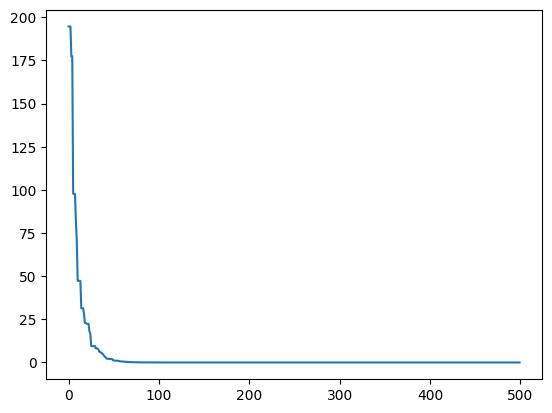

In [11]:
Pop= popinit(Ps)
# Initiate and store the Population Dictionary

Pop= geniter(Ps, Gs, Pop)
# Iterate the population through Evolution and store the final state

print(fittest(Ps, Pop)[1])
# Print the error between the Test chromosome and the Final chromosome

plt.plot(range(0, Gs), fitness)
# Plot the Fitness Vs Generation Curve for Evaluation

In [12]:
L=fittest(Ps,Pop)[0]

Jk=chrm()

for j in range(Cl):
        for k in range(Gl):
            for l in range(2):
                Jk[j][k][l]= np.abs(L[j][k][l]-T[j][k][l])

Jk

[[[0.0, 0.0], [0.0, 0.0]], [[0.0, 0.0], [0.0, 0.0]], [[0.0, 0.0], [0.0, 0.0]]]

Test cases:

Ps,Gs,Cl,Gl -> E,Time

K=0.7
F=(-2,2)

a) 100,100,3,2 -> 1.7, 1.5

b) 100,100,30,20 -> 46000, 1:20

c) 20,100,30,20 -> 49000, 17

d) 20,200,30,20 -> 44000, 31

e) 20,500,30,20 -> 38000, 1:15

f) 40,200,30,20 -> 42000, 1:03

g) 10,200,30,20 -> 49000, 16

h) 10,1000,30,20 -> 42000, 1:11

i) 20,1000,30,20 -> 34000, 2:29


j) 10,10,300,50 -> 1555K, 23

k) 20,10,300,50 -> 1472K, 48

k) 20,50,300,50 -> 1441K, 4:00

l) 30,10,300,50 -> 1511K, 1:12

K=0.8
F=(-1,1)

a) 10,10,300,50 -> 1522K, 38

b) 20,50,300,50 -> 1476K, 5:41